<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####**Spatial reidentification risks**

In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/reid_risk_con.csv')
## Franklin, PPV
df_f_ppv = df[(df["county"] == "Franklin") & (df["risk.type"] == "ppv")]
df_f_ppv = df_f_ppv.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='risk.value')
df_f_ppv = df_f_ppv[['blk', 'bg', 'tr']]

## Franklin, TPR
df_f_tpr = df[(df["county"] == "Franklin") & (df["risk.type"] == "tpr")]
df_f_tpr = df_f_tpr.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='risk.value')
df_f_tpr = df_f_tpr[['blk', 'bg', 'tr']]

## Guernsey, PPV
df_g_ppv = df[(df["county"] == "Guernsey") & (df["risk.type"] == "ppv")]
df_g_ppv = df_g_ppv.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='risk.value')
df_g_ppv = df_g_ppv[['blk', 'bg', 'tr']]

## Guernsey, TPR
df_g_tpr = df[(df["county"] == "Guernsey") & (df["risk.type"] == "tpr")]
df_g_tpr = df_g_tpr.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='risk.value')
df_g_tpr = df_g_tpr[['blk', 'bg', 'tr']]

/content/gdrive/My Drive/Colab Notebooks/census_privacy


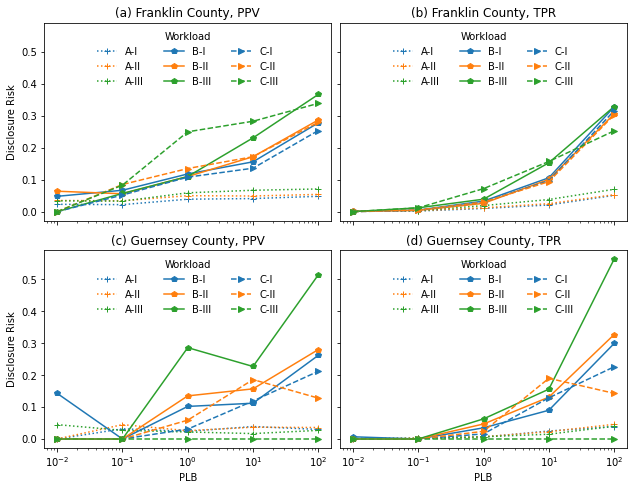

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (10,8))

## Franklin, PPV
ax = df_f_ppv.plot(xticks=df_f_ppv.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], 
                   xlabel='PLB', ylabel='Disclosure Risk', ax=axes[0, 0])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], 
          frameon=False, loc='upper center', ncol=3)
ax.set_title("(a) Franklin County, PPV")

## Franklin, TPR
ax = df_f_tpr.plot(xticks=df_f_tpr.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], 
                   xlabel='PLB', ylabel='Disclosure Risk', ax=axes[0, 1])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], 
          frameon=False, loc='upper center', ncol=3)
ax.set_title("(b) Franklin County, TPR")

## Guernsey, PPV
ax = df_g_ppv.plot(xticks=df_g_ppv.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], 
                   xlabel='PLB', ylabel='Disclosure Risk', ax=axes[1, 0])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], 
          frameon=False, loc='upper center', ncol=3)
ax.set_title("(c) Guernsey County, PPV")

## Guernsey, block group level
ax = df_g_tpr.plot(xticks=df_g_tpr.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], 
                  xlabel='PLB', ylabel='Disclosure Risk', ax=axes[1, 1])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], 
          frameon=False, loc='upper center', ncol=3)
ax.set_title("(d) Guernsey County, TPR")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/reid_risk_c.eps', format='eps')

####**Agreement rates**

In [4]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/recon_risk_con.csv')

## Franklin, block level
df_f_blk = df[df["county"] == "Franklin"]
df_f_blk = df_f_blk.pivot_table(index='plb', columns='aggregation.level', values='risk.value')
df_f_blk = df_f_blk[['blk', 'bg', 'tr']]

## Guernsey, tract level
df_g_blk = df[df["county"] == "Guernsey"]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['aggregation.level'], values='risk.value')
df_g_blk = df_g_blk[['blk', 'bg', 'tr']]

df_g_blk

/content/gdrive/My Drive/Colab Notebooks/census_privacy


aggregation.level,blk,bg,tr
plb,,,
0.01,0.039,0.776,0.896
0.10,0.063,0.892,0.938
1.00,0.117,0.952,0.972
10.00,0.145,0.969,0.981
100.00,0.165,0.988,0.993


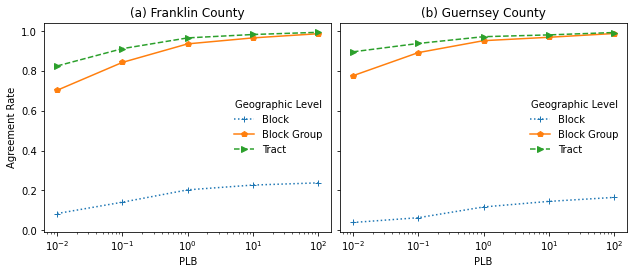

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,5))

## Franklin
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>--'], xlabel='PLB', ylabel='Agreement Rate', ax=axes[0])
ax.set_xscale('log')
ax.legend(title='Geographic Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(a) Franklin County")

## Guernsey
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>--'], xlabel='PLB', ylabel='Agreement Rate', ax=axes[1])
ax.set_xscale('log')
ax.legend(title='Geographic Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(b) Guernsey County")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/recon_risk.eps', format='eps')

####**Accuracy**

In [6]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/acc_con.csv')

## Franklin, block level
df_f_blk = df[df["county"] == "Franklin"]
df_f_blk = df_f_blk.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='mae')
df_f_blk = df_f_blk[['blk', 'bg', 'tr']]

## Guernsey, tract level
df_g_blk = df[df["county"] == "Guernsey"]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='mae')
df_g_blk = df_g_blk[['blk', 'bg', 'tr']]

df_g_blk

/content/gdrive/My Drive/Colab Notebooks/census_privacy


aggregation.level    blk                   bg  ...             tr               
qid                    1      2      3      1  ...       3      1      2       3
plb                                            ...                              
0.01               0.010  0.154  2.674  0.142  ...  20.922  0.216  3.070  43.543
0.10               0.009  0.146  2.520  0.064  ...  10.898  0.126  1.498  18.314
1.00               0.008  0.131  2.212  0.028  ...   3.788  0.055  0.629   6.514
10.00              0.008  0.124  2.120  0.018  ...   2.253  0.037  0.386   4.029
100.00             0.007  0.118  2.076  0.007  ...   0.939  0.013  0.163   1.429

[5 rows x 9 columns]

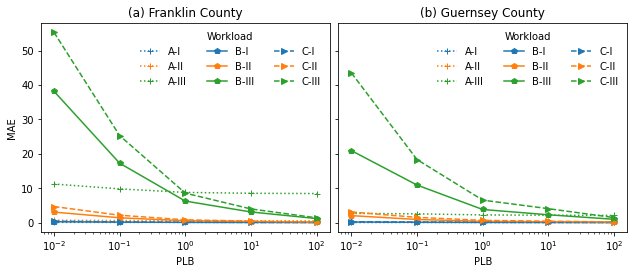

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,5))

## Franklin
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], xlabel='PLB', ylabel='MAE', ax=axes[0])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], frameon=False, loc='upper right', ncol=3)
ax.set_title("(a) Franklin County")

## Guernsey
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:C0','+:C1','+:C2','p-C0','p-C1','p-C2','>--C0','>--C1','>--C2'], xlabel='PLB', ylabel='MAE', ax=axes[1])
ax.set_xscale('log')
ax.legend(title='Workload', labels=['A-I', 'A-II', 'A-III', 'B-I', 'B-II', 'B-III', 'C-I', 'C-II', 'C-III'], frameon=False, loc='upper right', ncol=3)
ax.set_title("(b) Guernsey County")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/acc.eps', format='eps')